## Задание 1.

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?


In [1]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [2]:
# Подсчет количества случаев, когда идет дождь и когда шли на прогулку
total_days = len(data)
rainy_days = len([day for day in data if day[0] == 'дождь'])
walk_in_rain = len([day for day in data if day[0] == 'дождь' and day[1]])

In [3]:
# Вероятность идти на прогулку, при возможности увидеть дождь
prob_walk_given_rain = walk_in_rain / rainy_days

In [4]:
# Вероятность дождя
prob_rain = rainy_days / total_days

In [5]:
# Вероятность отправиться на прогулку в любом случае
prob_walk = sum([1 for day in data if day[1]]) / total_days

In [6]:
# Расчет вероятности отправиться на прогулку, при наличии дождя
prob_rain_given_walk = (prob_walk_given_rain * prob_rain) / prob_walk
print("Вероятность отправиться на прогулку при дожде:", prob_rain_given_walk)

Вероятность отправиться на прогулку при дожде: 0.125


## Задание 2.

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/Programs/ML-labs/data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Получим общую информацию о таблице одной командой:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Таблица содержит 23 столбца. Они хранят разный тип данных.

Количество значений столбцов разное. Это означает, что данные содержат пропущенные значения.

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Предварительная обработка данных (Data preprocessing)**
Найдём количество пропущеных значений в таблице.

In [12]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Заметим, что в датасете много пропущенных значений и они влияют на общую статистику.
В таком случае, считаю лучшим вариантом замену пропусков на среднее значение показателя в столбце.

In [13]:
df['MinTemp'] = df['MinTemp']. fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp']. fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall']. fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation']. fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine']. fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed']. fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am']. fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm']. fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am']. fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm']. fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am']. fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm']. fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am']. fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm']. fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am']. fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm']. fillna(df['Temp3pm'].mean())

columns_to_replace =['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' , 'RainTomorrow']
for row in columns_to_replace:
    df[row] = df[row].fillna('unknown')

In [14]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df['Date'] = df['Date'].str.replace('-','.')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008.12.01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008.12.02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008.12.03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008.12.04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008.12.05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017.06.21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017.06.22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017.06.23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017.06.24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


Данные выглядят "чистыми" .

Для создания в дальнейшем обучающей модели создадим новый датасет, который не будет иметь строковых значений.

In [16]:
sorted (df['Location'].str.split(',').str[0].unique())# вывод уникальных значений

['Adelaide',
 'Albany',
 'Albury',
 'AliceSprings',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Brisbane',
 'Cairns',
 'Canberra',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Darwin',
 'GoldCoast',
 'Hobart',
 'Katherine',
 'Launceston',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'MountGambier',
 'MountGinini',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Nuriootpa',
 'PearceRAAF',
 'Penrith',
 'Perth',
 'PerthAirport',
 'Portland',
 'Richmond',
 'Sale',
 'SalmonGums',
 'Sydney',
 'SydneyAirport',
 'Townsville',
 'Tuggeranong',
 'Uluru',
 'WaggaWagga',
 'Walpole',
 'Watsonia',
 'Williamtown',
 'Witchcliffe',
 'Wollongong',
 'Woomera']

In [17]:
sorted (df['WindDir9am'].str.split(',').str[0].unique())# вывод уникальных значений

['E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'unknown']

In [18]:
sorted (df['WindDir3pm'].str.split(',').str[0].unique())# вывод уникальных значений

['E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'unknown']

In [19]:
sorted (df['RainToday'].str.split(',').str[0].unique())# вывод уникальных значений

['No', 'Yes', 'unknown']

In [20]:
sorted (df['RainTomorrow'].str.split(',').str[0].unique())# вывод уникальных значений

['No', 'Yes', 'unknown']

Удалим столбцы 'Date' , 'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [21]:
df.drop(['Location', 'Date' , 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis= 1 , inplace= True ) 

In [22]:
# Замена значений в столбце 'RainToday'
df['RainToday'] = df['RainToday'].replace(['No', 'Yes', 'unknown'], [0, 1, 0])

# Замена значений в столбце 'RainTomorrow'
df['RainTomorrow'] = df['RainTomorrow'].replace(['No', 'Yes', 'unknown'], [0, 1, 0])

print(df)

        MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4  22.900000       0.6     5.468232  7.611178       44.00000   
1           7.4  25.100000       0.0     5.468232  7.611178       44.00000   
2          12.9  25.700000       0.0     5.468232  7.611178       46.00000   
3           9.2  28.000000       0.0     5.468232  7.611178       24.00000   
4          17.5  32.300000       1.0     5.468232  7.611178       41.00000   
...         ...        ...       ...          ...       ...            ...   
145455      2.8  23.400000       0.0     5.468232  7.611178       31.00000   
145456      3.6  25.300000       0.0     5.468232  7.611178       22.00000   
145457      5.4  26.900000       0.0     5.468232  7.611178       37.00000   
145458      7.8  27.000000       0.0     5.468232  7.611178       28.00000   
145459     14.9  23.221348       0.0     5.468232  7.611178       40.03523   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  P

### Выделим целевой признак и предикторы

In [23]:
y = df["RainTomorrow"]
X = df.drop(["RainTomorrow"], axis=1)

In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [25]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0


### Балансировка классов

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [27]:

train_df, test_df = train_test_split(df, test_size=0.2)

Доля вероятности, что на следующий день пойдёт дождь 0.2191


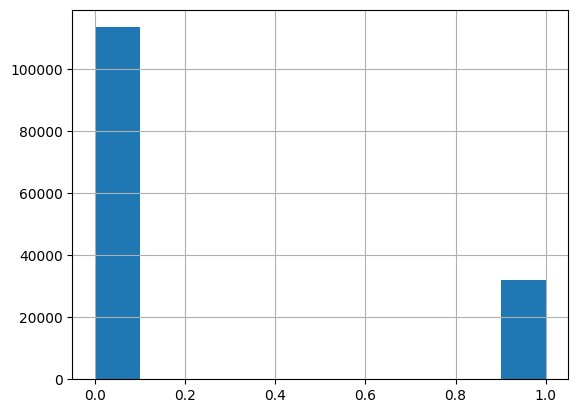

In [28]:
df.RainTomorrow.hist()
print(f'Доля вероятности, что на следующий день пойдёт дождь {np.sum(df.RainTomorrow==1)/len(df.RainTomorrow):.4f}')

Классы явно не сбалансированы


Доля вероятности, что на следующий день пойдёт дождь: 0.5


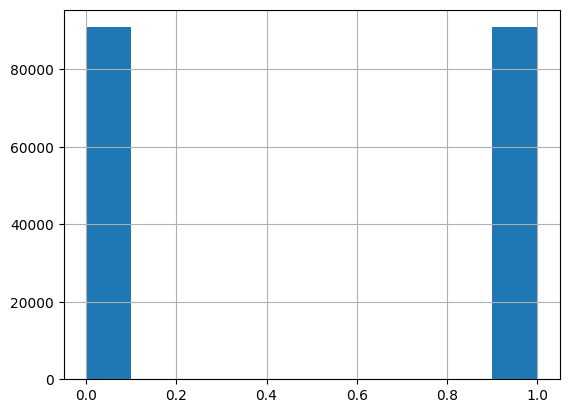

In [29]:
from sklearn.utils import resample

maj_class = train_df[train_df['RainTomorrow'] == 0]
min_class = train_df[train_df['RainTomorrow'] == 1]

min_upsampled = resample(min_class, n_samples=len(maj_class), random_state=42)

sampled_df = pd.concat((maj_class, min_upsampled))
sampled_df['RainTomorrow'].hist()

probability_of_rain = sampled_df['RainTomorrow'].mean()
print(f'Доля вероятности, что на следующий день пойдёт дождь: {probability_of_rain}')


Разбиваю датасет на тренировочную и тестовую части

### Разделим данные на обучающую и тестовую выборки

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RainTomorrow', axis=1), df.RainTomorrow)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((109095, 17), (109095,), (36365, 17), (36365,))

Итак, данные предобработаны, целевой признак выделен, имеются обучающая и тестовая выборка. Мы готовы приступить к обучению.

### Нормализация данных (масштабирование признаков)

In [32]:
# библиотека обработки признаков
from sklearn.preprocessing import StandardScaler
# Выполнение стандартизации при помощи StandardScaler()
sc = StandardScaler()
# Масштабирование признаков с помощью метода fit_transform()
# для train data
X_train = sc.fit_transform(X_train)
#Метод transform() к test data, которые трансформируются или
# масштабируются при помощи параметров модели, обученной наприменении соответствующего метода на train data
X_test = sc.transform(X_test)

In [33]:
from sklearn.decomposition import PCA
# Пример использования PCA для уменьшения размерности данных
pca = PCA(n_components=2) # Указание количества главных компонент
X_train_pca = pca.fit_transform(X_train) # Применение PCA к train data
X_test_pca = pca.transform(X_test) # Применение PCA к test data

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

### Обучение и прогнозы n

In [36]:
# Определить модель KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
knn_param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['minkowski']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, n_jobs=-1) # использование нескольких ядер процессора для ускоренияknn_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
print("Best parameters for K-NN:", knn_grid_search.best_params_) 

Best parameters for K-NN: {'metric': 'minkowski', 'n_neighbors': 7}


In [38]:
# Делать предсказания
y_bin_knn_pred = knn_grid_search.predict(X_test)

### Оценка алгоритма

In [39]:
from sklearn.metrics import classification_report, confusion_matrix 
print("k-NN Confusion Matrix:")
print(confusion_matrix(y_test, y_bin_knn_pred))
print("k-NN Classification Report:")
print(classification_report(y_test, y_bin_knn_pred))

k-NN Confusion Matrix:
[[26478  1875]
 [ 4189  3823]]
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     28353
           1       0.67      0.48      0.56      8012

    accuracy                           0.83     36365
   macro avg       0.77      0.71      0.73     36365
weighted avg       0.82      0.83      0.82     36365



In [40]:
# Вычисляем значения метрик
accuracy_knn = accuracy_score(y_test, y_bin_knn_pred)
precision_knn = precision_score(y_test, y_bin_knn_pred)
recall_knn = recall_score(y_test, y_bin_knn_pred)
f1_knn = f1_score(y_test,y_bin_knn_pred)
roc_auc_knn = roc_auc_score(y_test, y_bin_knn_pred)

In [41]:
# Выводим результаты
print("k-NN:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1:", f1_knn)
print("ROC AUC score:", roc_auc_knn)

k-NN:
Accuracy: 0.8332462532655025
Precision: 0.670937170937171
Recall: 0.4771592611083375
F1: 0.5576951130561634
ROC AUC score: 0.7055143464572479


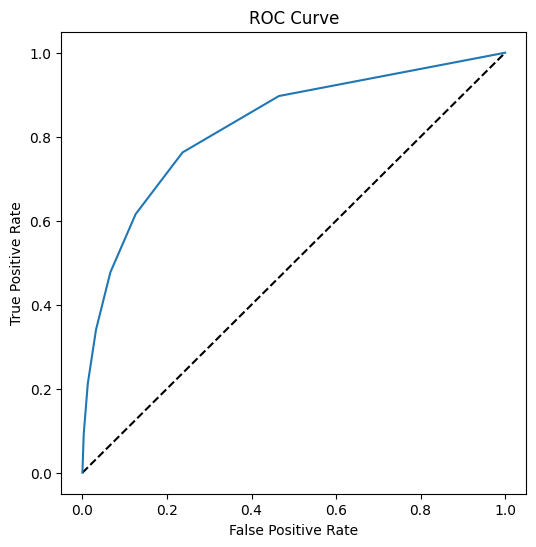

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = knn_grid_search.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

### Обучение и прогнозы

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Подбор гиперпараметров для логистической регрессии
logreg_param_grid = {'C': [0.1, 1, 10]}
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", logreg_grid_search.best_params_)

Best parameters for Logistic Regression: {'C': 0.1}


In [46]:
y_logreg_pred = logreg_grid_search.predict(X_test)

### Оценка алгоритма

In [47]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_logreg_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test,y_logreg_pred))
print('Predicted labels: ', y_logreg_pred)
print('F1-score: ', f1_score(y_test,y_logreg_pred))

Logistic Regression Confusion Matrix:
[[26757  1596]
 [ 4202  3810]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     28353
           1       0.70      0.48      0.57      8012

    accuracy                           0.84     36365
   macro avg       0.78      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365

Predicted labels:  [0 0 0 ... 0 1 0]
F1-score:  0.5678938739007304


Видно из приведенной выше вывода матрицы возмущений, существует <font color=darkred>4100 + 1485 = 5585 неправильных прогнозов </font> и <font color=green>26925 + 3855 = 30780 правильных</font> прогнозов.

In [48]:
accuracy_lr = accuracy_score(y_test, y_logreg_pred)
precision_lr = precision_score(y_test, y_logreg_pred)
recall_lr = recall_score(y_test, y_logreg_pred)
f1_lr = f1_score(y_test,y_logreg_pred)
roc_auc_lr = roc_auc_score(y_test, y_logreg_pred)

In [49]:
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1:", f1_lr)
print("ROC AUC score:", roc_auc_lr)

Logistic Regression:
Accuracy: 0.8405609789632889
Precision: 0.704772475027747
Recall: 0.4755366949575637
F1: 0.5678938739007304
ROC AUC score: 0.7096231776554827


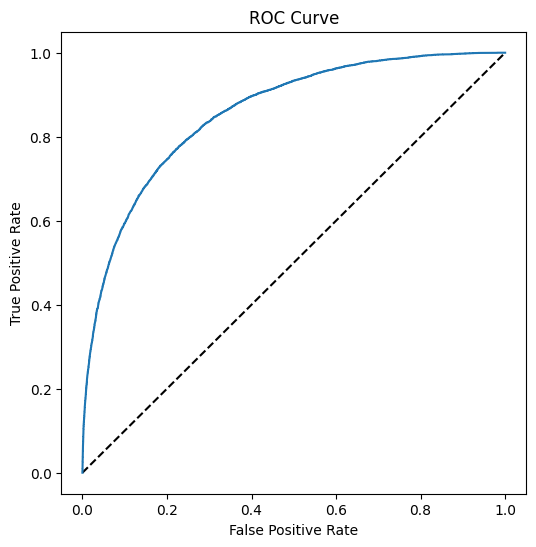

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = logreg_grid_search.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#  Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

### Обучение и прогнозы

In [52]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
# Определяем сетку гиперпараметров для подбора
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
# оптимального значения var_smoothing позволяет найти баланс между сглаживанием и сохранением информации в модели
# Используем GridSearchCV для подбора оптимального значения гиперпараметра
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X, y)

# Выводим оптимальное значение гиперпараметра
print(grid_search.best_params_)

{'var_smoothing': 1e-05}


In [54]:
# Predicting the Test set results
y_bin_nb_pred = nb.predict(X_test)

### Оценка алгоритма

In [55]:
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_bin_nb_pred ))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_bin_nb_pred ))

Naive Bayes Confusion Matrix:
[[24353  4000]
 [ 3162  4850]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     28353
           1       0.55      0.61      0.58      8012

    accuracy                           0.80     36365
   macro avg       0.72      0.73      0.72     36365
weighted avg       0.81      0.80      0.81     36365



Видно из приведенной выше вывода матрицы возмущений, существует <font color=darkred>3139 + 3875 = 7014 неправильных прогнозов </font> и <font color=green>24535 + 4816 = 29351 правильных</font> прогнозов.

In [56]:
accuracy_nb = accuracy_score(y_test,y_bin_nb_pred)
precision_nb = precision_score(y_test, y_bin_nb_pred)
recall_nb = recall_score(y_test, y_bin_nb_pred)
f1_nb = f1_score(y_test, y_bin_nb_pred)
roc_auc_nb = roc_auc_score(y_test, y_bin_nb_pred)

In [57]:
print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1:", f1_nb)
print("ROC AUC score:", roc_auc_nb)

Naive Bayes:
Accuracy: 0.8030523855355424
Precision: 0.5480225988700564
Recall: 0.6053419870194708
F1: 0.5752579765152414
ROC AUC score: 0.7321317207696373


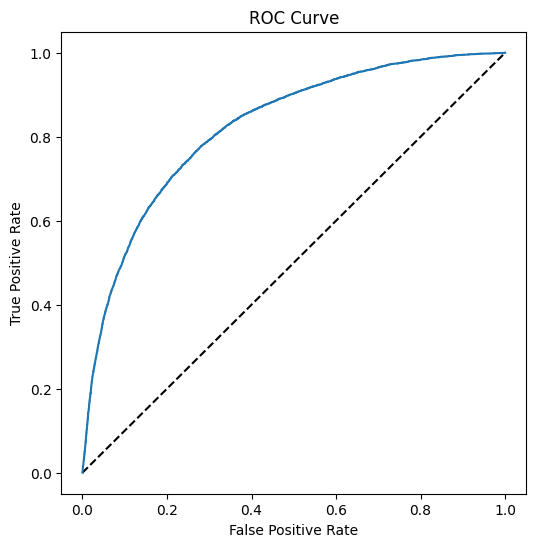

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = nb.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

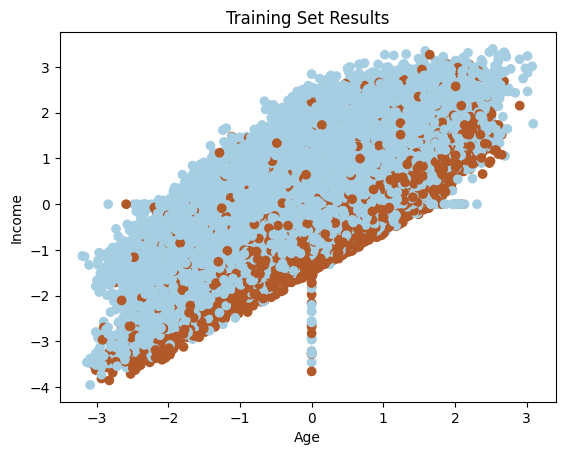

In [59]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Training Set Results')
plt.show()

# SVM

In [60]:
from sklearn.svm import SVC

### Обучение и прогнозы

In [61]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)

In [62]:
# Определение сетки параметров для поиска
#svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

# Инициализация объекта GridSearchCV с использованием n_jobs=-1
#svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=3, n_jobs=-1)

# Поиск наилучших параметров
#svm_grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
#print("Best parameters for SVM:", svm_grid_search.best_params_)

In [63]:
# Predicting the Test set results
y_svm_pred = svm.predict(X_test)

### Оценка алгоритма

In [64]:
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, y_svm_pred))

SVM Confusion Matrix:
[[27223  1130]
 [ 4370  3642]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     28353
           1       0.76      0.45      0.57      8012

    accuracy                           0.85     36365
   macro avg       0.81      0.71      0.74     36365
weighted avg       0.84      0.85      0.83     36365



In [65]:
#Видно из приведенной выше вывода матрицы возмущений, существует <font color=darkred>3139 + 3875 = 7014 неправильных прогнозов </font> и <font color=green>24535 + 4816 = 29351 правильных</font> прогнозов.

In [66]:
accuracy_svm = accuracy_score(y_test, y_svm_pred)
precision_svm = precision_score(y_test, y_svm_pred)
recall_svm = recall_score(y_test, y_svm_pred)
f1_svm = f1_score(y_test, y_svm_pred)
roc_auc_svm = roc_auc_score(y_test, y_svm_pred)

In [67]:
print("SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1:", f1_svm)
print("ROC AUC score:", roc_auc_svm)

SVM:
Accuracy: 0.8487556716623127
Precision: 0.7632020117351216
Recall: 0.4545681477783325
F1: 0.5697747183979975
ROC AUC score: 0.7073567293400886


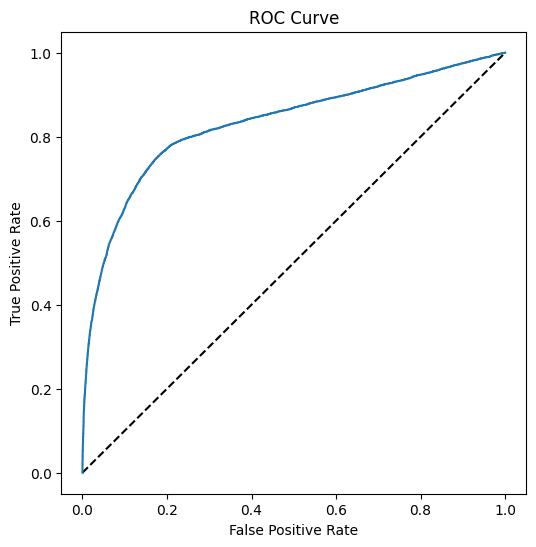

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = svm.decision_function(X_test)

# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Построение модели классификаций

In [69]:
cuisines_label_df = df['RainTomorrow']
cuisines_label_df.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [70]:
cuisines_feature_df = df.drop(['RainTomorrow'], axis=1)
cuisines_feature_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


In [71]:
# Попробуем разные классификаторы

In [72]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

In [74]:
C = 10
# Создайте различные классификаторы.

classifiers = {
    'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
    'KNN classifier': KNeighborsClassifier(C),
#    'SVC': SVC(),
#    'RFST': RandomForestClassifier(n_estimators=100),
#    'ADA': AdaBoostClassifier(n_estimators=100)
}


In [ ]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

## • Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [77]:
y_true = [1, 0, 1, 1, 0, 0]
y_pred = [1, 0, 0, 1, 0, 1]

Accuracy (точность) является общей метрикой оценки производительности модели и определяется как отношение числа правильно классифицированных образцов ко всем образцам в наборе данных.


In [82]:
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

print("Accuracy:", accuracy(y_true, y_pred))

Accuracy: 0.6666666666666666


Precision (точность) измеряет, насколько точно модель классифицирует положительные образцы и определяется как отношение числа правильно классифицированных положительных образцов к общему числу прогнозируемых положительных образцов.

In [88]:
# Реализация метрики Precision
def precision(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positives += 1
    return true_positives / (true_positives + false_positives)
y_test = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]
print("Precision:", precision(y_test, y_pred))

Precision: 1.0


Recall (полнота) измеряет, насколько хорошо модель находит положительные образцы и определяется как отношение числа правильно классифицированных положительных образцов к общему числу фактических положительных образцов.

In [89]:
def recall(y_true, y_pred):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1
    return true_positives / (true_positives + false_negatives)
y_test = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]
print("Recall:", recall(y_test, y_pred))

Recall: 0.6666666666666666


 F1-мера является гармоническим средним между точностью и полнотой и определяется как отношение двукратного произведения точности и полноты к их сумме.

In [90]:
def f1_score(y_true, y_pred):
    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    return (2 * precision_value * recall_value) / (precision_value + recall_value)
y_test = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8


## • Самостоятельно реализуйте kNN.

In [91]:
class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Вычисляем расстояния до всех объектов обучающей выборки
            distances = np.sqrt(np.sum((x - self.X)**2, axis=1))
            # Сортируем расстояния по возрастанию и выбираем k ближайших соседей
            k_nearest = np.argsort(distances)[:self.k]
            # Вычисляем класс с наибольшим количеством соседей
            classes = np.unique(self.y[k_nearest])
            counts = [np.count_nonzero(self.y[k_nearest] == c) for c in classes]
            y_pred.append(classes[np.argmax(counts)])
        return np.array(y_pred)
